 <p style="background:#008000;color:#ffffff; text-align:center;font-size:30px;padding:15px;font-family:Sans-serif"> Recommendation System - Online Course</p>

#### Problem Statement
The goal of this dataset is to build an online course recommendation system that suggests relevant courses to learners based on their interests, past enrollments, and engagement levels. The dataset includes course ratings, instructor information, previous learning history, study material availability, and certification offerings, making it suitable for recommendation models using collaborative filtering, content-based filtering, or hybrid approaches


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Import required libraries</p>

In [1]:
# pip install openpyxl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Load Dataset</p>

In [3]:
df = pd.read_excel('online_course_recommendation_v2.xlsx')
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Exploratory Data Analysis (EDA)</p>

In [4]:
print("Dataset Shape : ", df.shape)

Dataset Shape :  (100000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [6]:
print(df.loc[df['course_name'] == 'AI for Business Leaders', 'course_id'])

52        687
57       2914
71       9819
90        823
97       4429
         ... 
99846    7083
99862    2226
99959    1363
99969    3407
99978    5805
Name: course_id, Length: 5007, dtype: int64


In [7]:
df.iloc[[52, 57, 71, 90, 97]].sample(n=5)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
71,5676,9819,AI for Business Leaders,Dr. Mia Walker,83.7,Yes,Intermediate,4.3,36609,495.10,0.742,Yes,34.30,8
97,48985,4429,AI for Business Leaders,Liam Adams,95.5,No,Intermediate,3.3,30951,150.37,0.617,Yes,22.59,6
90,12186,823,AI for Business Leaders,Benjamin Lewis,12.7,Yes,Beginner,5.0,16114,60.56,0.594,Yes,23.39,3
57,35921,2914,AI for Business Leaders,Daniel White,79.5,Yes,Beginner,5.0,5112,487.39,0.611,Yes,1.12,6
52,48556,687,AI for Business Leaders,Alexander Young,40.2,Yes,Intermediate,4.5,33985,250.42,1.000,Yes,25.29,1


In [8]:
df['course_id'].value_counts()

course_id
1139    23
3658    23
4335    23
346     22
2501    21
        ..
4233     2
7525     2
8403     2
5636     2
9060     1
Name: count, Length: 9998, dtype: int64

In [9]:
df['course_name'].value_counts()

course_name
Networking and System Administration         5107
Cybersecurity for Professionals              5078
Advanced Machine Learning                    5063
Ethical Hacking Masterclass                  5062
Graphic Design with Canva                    5057
DevOps and Continuous Deployment             5037
Public Speaking Mastery                      5028
Mobile App Development with Swift            5024
Stock Market and Trading Strategies          5022
Data Visualization with Tableau              5010
AI for Business Leaders                      5007
Photography and Video Editing                4995
Project Management Fundamentals              4981
Blockchain and Decentralized Applications    4972
Fundamentals of Digital Marketing            4965
Personal Finance and Wealth Building         4933
Python for Beginners                         4931
Cloud Computing Essentials                   4926
Fitness and Nutrition Coaching               4903
Game Development with Unity           

In [10]:
df['rating'].value_counts()

rating
5.0    11868
4.0     5101
4.1     4986
3.9     4883
3.8     4860
4.2     4724
4.3     4683
3.7     4664
4.4     4492
3.6     4357
4.5     4101
3.5     4028
3.4     3707
4.6     3692
3.3     3419
4.7     3397
4.8     3022
3.2     3007
3.1     2608
4.9     2572
3.0     2244
2.9     1915
2.8     1640
2.7     1384
2.6     1112
2.5      899
2.4      686
2.3      492
2.2      414
2.1      310
2.0      204
1.9      186
1.8       98
1.7       74
1.6       51
1.5       41
1.4       29
1.3       22
1.0       10
1.2        9
1.1        9
Name: count, dtype: int64

In [11]:
## Finding unique Course ID
print(df.course_id.unique())
len(df.course_id.unique())

[9366 1928 9541 ... 4445 4004 5636]


9998

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
## Finding unique learners
print(df.user_id.unique())
len(df.user_id.unique())

[15796   861 38159 ... 14669 49654 12929]


43242

In [14]:
## Finding unique Instructors
print(df.instructor.unique())
len(df.instructor.unique())

['Emma Harris' 'Alexander Young' 'Dr. Mia Walker' 'Benjamin Lewis'
 'Daniel White' 'Dr. John Smith' 'Dr. Robert Davis' 'Liam Adams'
 'Prof. Emily Johnson' 'Isabella Scott' 'Charlotte King' 'Sarah Lee'
 'Sophia Anderson' 'James Clark' 'Ethan Hall' 'Olivia Taylor'
 'Michael Brown' 'William Thomas' 'Jessica Martinez' 'David Wilson']


20

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Handeling missing values</p> 

In [15]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Most of the users rated the course with 5 star rating.
* There are around 9998 unique courses. 
* No duplicate records
* Around 43242 learners / Users and 20 instructors
* The dataset does not have any of the missing values
* The datatypes for all the features is appropriate.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Dataset Summary</p>  

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,24935.663570,14406.960108,1.000,12487.750,24793.50,37382.2500,49999.00
course_id,100000.0,5006.863560,2882.085456,1.000,2523.000,5012.00,7502.0000,9999.00
course_duration_hours,100000.0,52.383540,27.423470,5.000,28.600,52.40,76.1000,100.00
rating,100000.0,3.959859,0.729958,1.000,3.500,4.00,4.5000,5.00
enrollment_numbers,100000.0,25052.822850,14388.188356,50.000,12583.750,25057.50,37522.0000,49999.00
course_price,100000.0,261.073369,139.013758,20.000,140.100,262.31,381.7025,500.00
feedback_score,100000.0,0.746865,0.143683,0.092,0.649,0.75,0.8510,1.00
time_spent_hours,100000.0,20.691054,13.669148,1.000,9.900,19.92,30.0800,84.15
previous_courses_taken,100000.0,4.992670,2.237259,0.000,3.000,5.00,6.0000,19.00


In [17]:
df.describe(include=object).T

,count,unique,top,freq
course_name,100000,20,Networking and System Administration,5107
instructor,100000,20,Jessica Martinez,5092
certification_offered,100000,2,Yes,70059
difficulty_level,100000,3,Beginner,49877
study_material_available,100000,2,Yes,85147


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Visualization</p>

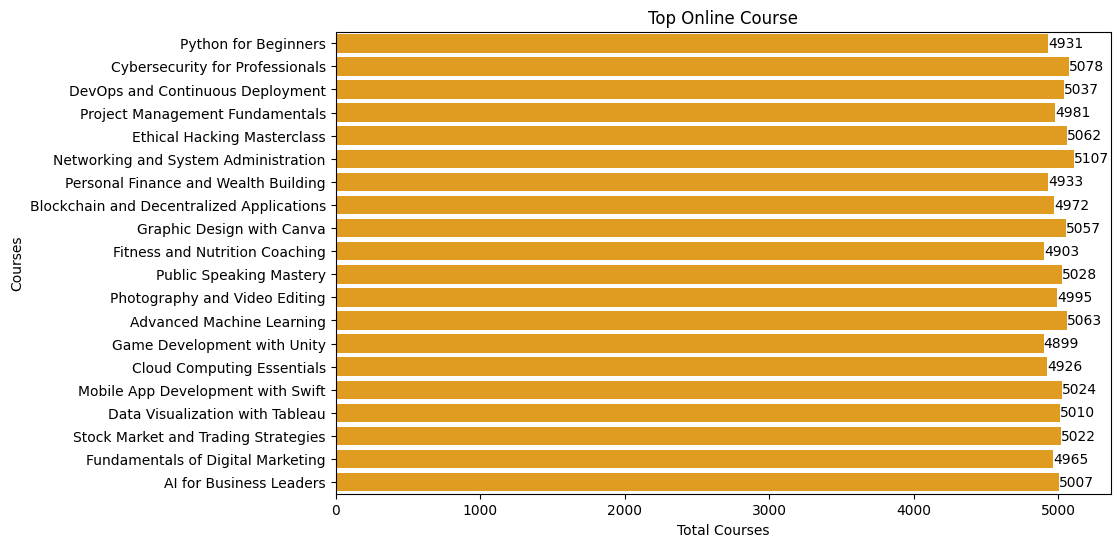

In [18]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y = df['course_name'],color='orange')
ax.bar_label(ax.containers[0])
plt.title("Top Online Course")
plt.xlabel("Total Courses")
plt.ylabel("Courses")
plt.show()

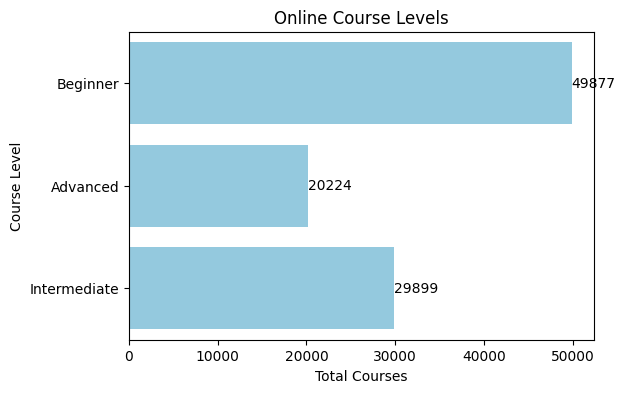

In [19]:
plt.figure(figsize=(6,4))
ax = sns.countplot(y = df['difficulty_level'],color='skyblue')
ax.bar_label(ax.containers[0])
plt.title("Online Course Levels")
plt.xlabel("Total Courses")
plt.ylabel("Course Level")
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Theres are around 49877 courses availbale with beginner level.
* The intermidiate and advanced courses are less as compared to the beginner level
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

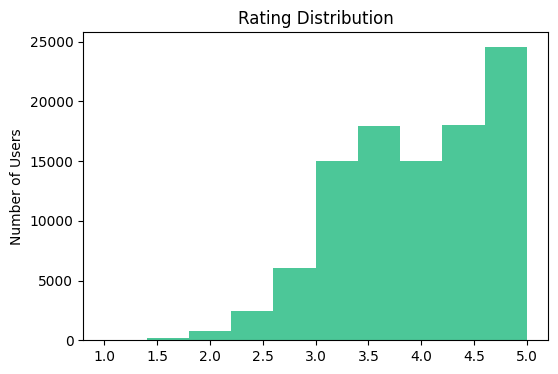

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df['rating'], bins=10,color='#4CC798')
plt.ylabel("Number of Users")
plt.title("Rating Distribution")
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Here we can clearly see the user rating distribution is left skewed / negatvely skewed.
* Most of the courses andd highly rated with around star ratings between 3.5 to 5.0
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

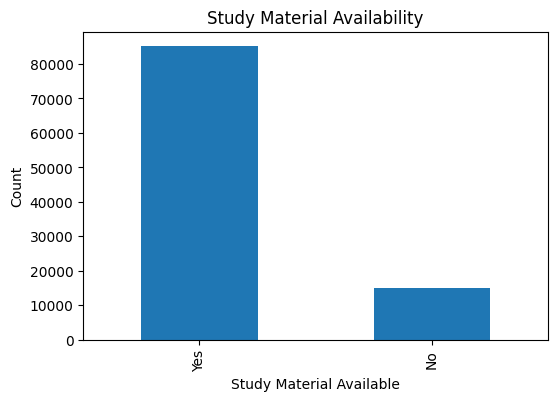

In [21]:
study_material = df['study_material_available'].value_counts()
plt.figure(figsize=(6,4))
study_material.plot(kind='bar')
plt.xlabel("Study Material Available")
plt.ylabel("Count")
plt.title("Study Material Availability")
plt.show()

certification_offered
Yes    70059
No     29941
Name: count, dtype: int64


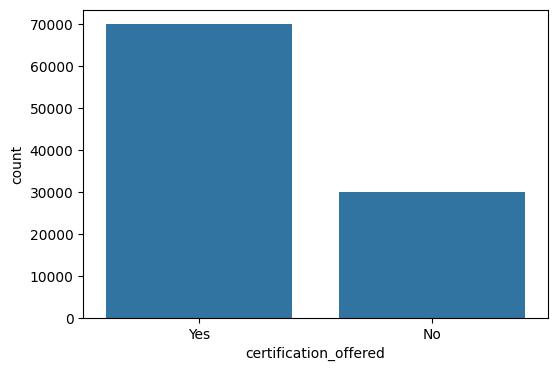

In [22]:
print(df['certification_offered'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=df['certification_offered'], data=df)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Most of the courses provides study meaterial and certificate for courses 
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

In [23]:
top_courses = df.sort_values(['feedback_score'], ascending=False)
top_courses.head(5)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
99950,3033,1155,Photography and Video Editing,Daniel White,38.7,Yes,Beginner,3.0,29606,424.85,1.0,No,49.22,1
24930,30870,4551,Fitness and Nutrition Coaching,Olivia Taylor,32.9,Yes,Advanced,4.1,4692,64.03,1.0,Yes,35.80,6
51955,37065,175,Stock Market and Trading Strategies,James Clark,45.9,No,Intermediate,3.5,38166,318.94,1.0,Yes,17.84,3
51957,13031,8814,AI for Business Leaders,Prof. Emily Johnson,35.8,Yes,Beginner,4.0,29660,412.46,1.0,Yes,22.81,4
89126,28121,4146,AI for Business Leaders,Jessica Martinez,30.6,Yes,Advanced,5.0,20124,42.56,1.0,Yes,17.43,2


In [24]:
top_courses['rating'][:10]

99950    3.0
24930    4.1
51955    3.5
51957    4.0
89126    5.0
51972    4.5
8509     3.8
89113    4.2
8432     3.8
8438     3.6
Name: rating, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_1768\3252303463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_courses, x=top_courses["course_name"][:10],y=top_courses["rating"], palette='viridis')


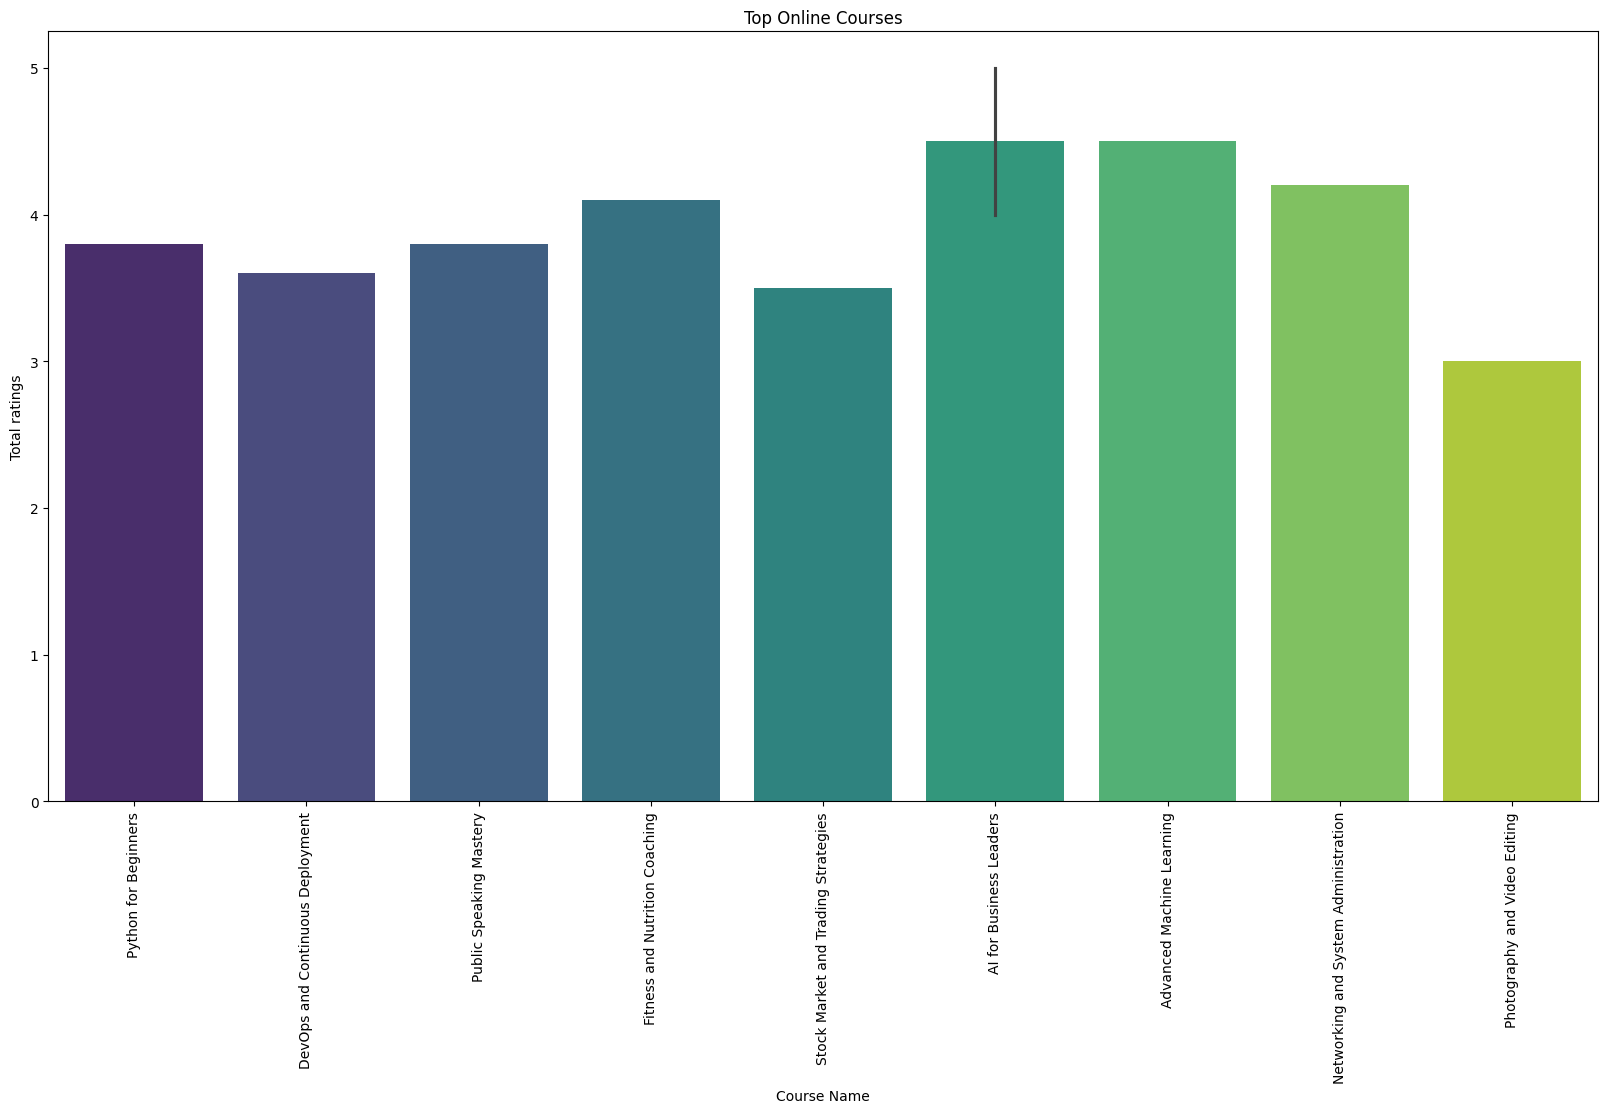

In [25]:
order = top_courses['rating'][:10]
plt.figure(figsize=(20,10))
sns.barplot(data=top_courses, x=top_courses["course_name"][:10],y=top_courses["rating"], palette='viridis')
plt.title("Top Online Courses")
plt.xlabel("Course Name")
plt.ylabel("Total ratings")
plt.xticks(rotation=90)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Sorted with the feedback score,we can see the AI for business leaders and advanced machine learning courses are top online courses with high ratings
* After that Networking and system aministration and Fitness and Nutritian coching are second top online highly rated courses.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### Separting Numerical and Categorical Columns for visualization

In [26]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: Index(['user_id', 'course_id', 'course_duration_hours', 'rating',
       'enrollment_numbers', 'course_price', 'feedback_score',
       'time_spent_hours', 'previous_courses_taken'],
      dtype='object')
Categorical columns: Index(['course_name', 'instructor', 'certification_offered',
       'difficulty_level', 'study_material_available'],
      dtype='object')


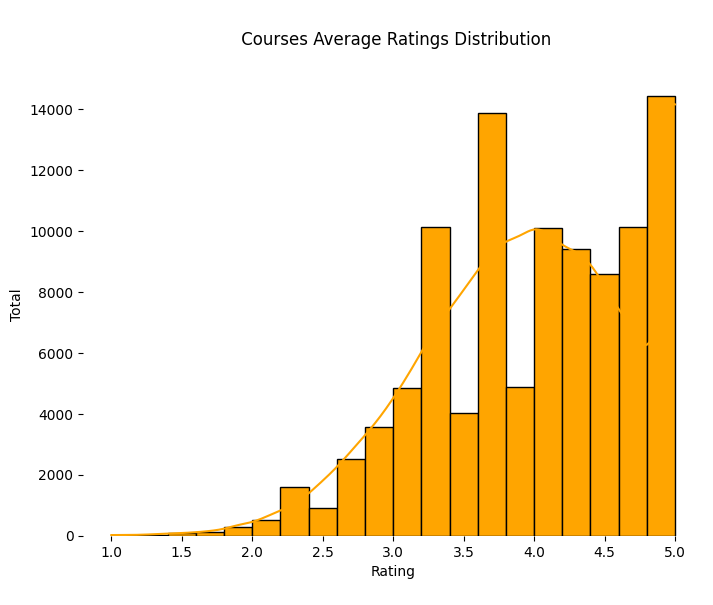

In [27]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
top_courses_temp = df.sort_values(['rating'],ascending=False)
sns.histplot(top_courses_temp["rating"],kde=True,bins=20,alpha=1,fill=True,color='orange')
plt.title("\n Courses Average Ratings Distribution\n")
plt.xlabel("Rating\n")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* From the histogram, we can see the data is negatively skewed to the left, with the high ratings between 3.5 to 5.0
* Few courses have ratings below 3.0
* The peak of the graph lies between the 4.0 an 4.5
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

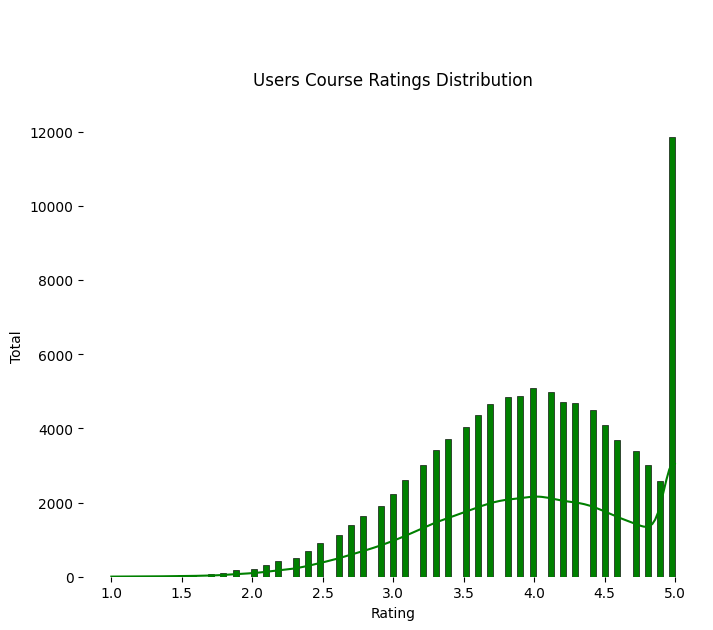

In [28]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=6.0)
sns.histplot(df["rating"],color='green',kde=True,bins="auto",alpha=1,fill=True)
plt.title("\n\n\nUsers Course Ratings Distribution\n")
plt.xlabel("Rating")
plt.ylabel("Total")
sns.despine(left=True, bottom=True)
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Here we can clearly see the users course rating disctibutions, approximatly 12000 courses are rated with 5..0 rating which is very high
* Most of the courses rated between te 3.5 and 4.5
* Below 3.0 rating the course number is very less
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Outlier Detection and treatments</p>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'user_id'),
  Text(1, 0, 'course_id'),
  Text(2, 0, 'course_duration_hours'),
  Text(3, 0, 'rating'),
  Text(4, 0, 'enrollment_numbers'),
  Text(5, 0, 'course_price'),
  Text(6, 0, 'feedback_score'),
  Text(7, 0, 'time_spent_hours'),
  Text(8, 0, 'previous_courses_taken')])

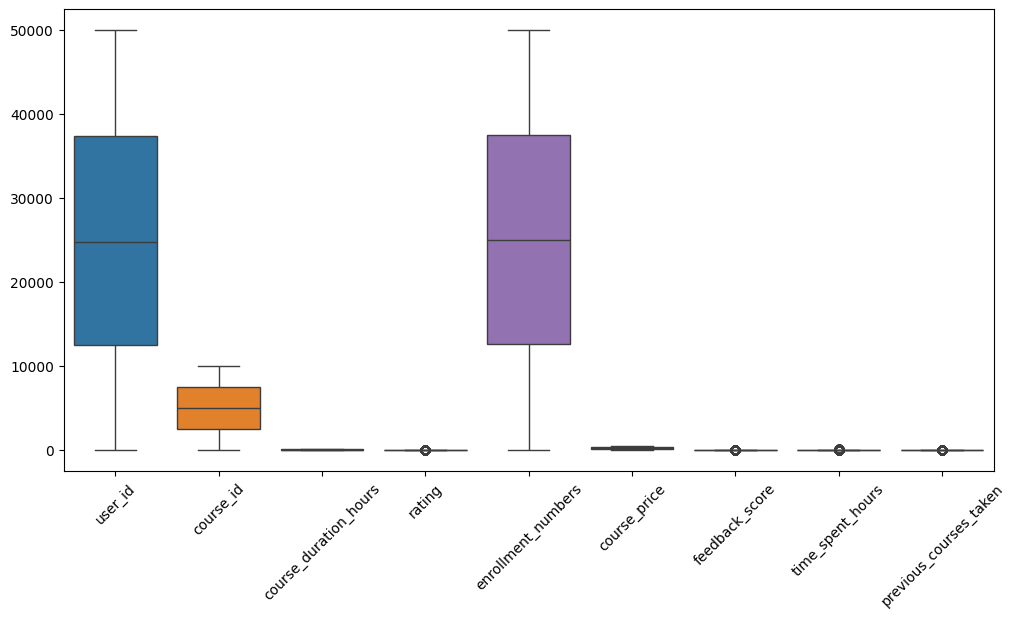

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

{'whiskers': [<matplotlib.lines.Line2D at 0x251262608f0>,
 'caps': [<matplotlib.lines.Line2D at 0x25126260ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25126260650>],
 'medians': [<matplotlib.lines.Line2D at 0x251262613d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25126261670>],
 'means': []}

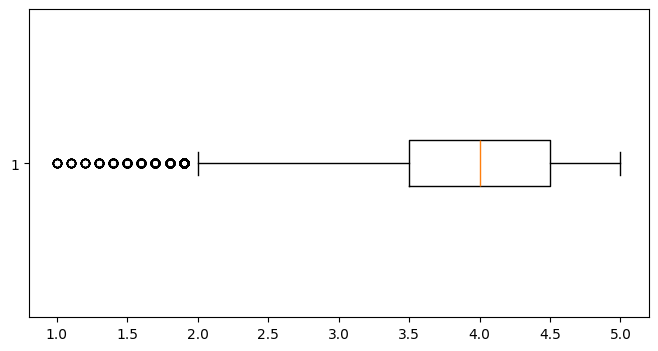

In [30]:
plt.figure(figsize=(8,4))
plt.boxplot(df['rating'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x251262d7410>,
 'caps': [<matplotlib.lines.Line2D at 0x251259e0b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x251259e0a70>],
 'medians': [<matplotlib.lines.Line2D at 0x251259e1100>],
 'fliers': [<matplotlib.lines.Line2D at 0x251259e13d0>],
 'means': []}

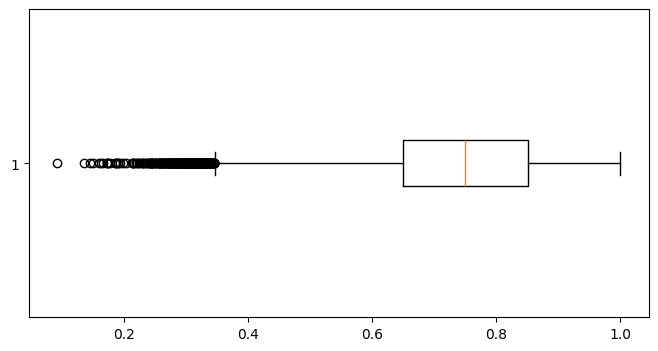

In [31]:
plt.figure(figsize=(8,4))
plt.boxplot(df['feedback_score'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x25125a1a630>,
 'caps': [<matplotlib.lines.Line2D at 0x25125a1aba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25125a1a330>],
 'medians': [<matplotlib.lines.Line2D at 0x25125a1b170>],
 'fliers': [<matplotlib.lines.Line2D at 0x25125a1b410>],
 'means': []}

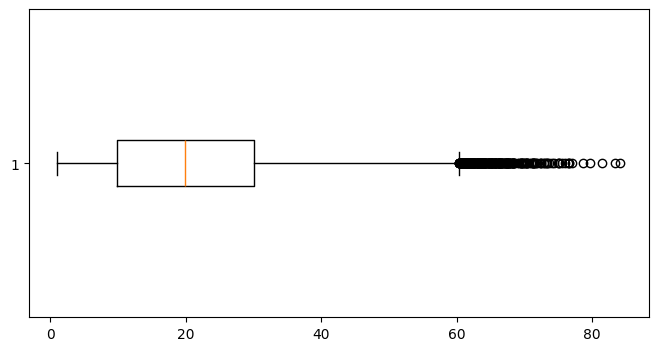

In [32]:
plt.figure(figsize=(8,4))
plt.boxplot(df['time_spent_hours'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x25125988a40>,
 'caps': [<matplotlib.lines.Line2D at 0x25125988fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x251259887a0>],
 'medians': [<matplotlib.lines.Line2D at 0x251259895e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x251259898e0>],
 'means': []}

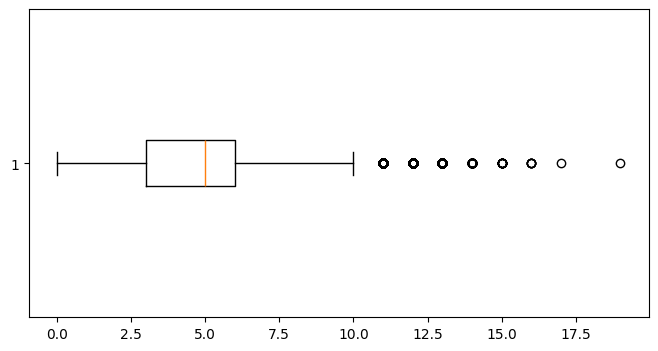

In [33]:
plt.figure(figsize=(8,4))
plt.boxplot(df['previous_courses_taken'],vert=False)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* From the box plot we can clearly see the presence of the outliers in some columns.
* The features rating, feedback_score, time_spent_hours, previous_courses_taken contains the outliers on lower side and upper side.
* We will treat only these columns with IQR method 
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Treating Outliers</p>

In [34]:
def outliers_detection_fixes(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower = Q1 - 1.5 * IQR
        Upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > Upper, Upper, np.where(df[col] < Lower, Lower, df[col]))
    return df

In [35]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [36]:
outliers_detection_fixes(df, ['rating','feedback_score','time_spent_hours','previous_courses_taken'])

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4.0
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9.0
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4.0
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6.0
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10647,5466,Graphic Design with Canva,Emma Harris,17.3,Yes,Beginner,3.9,49101,485.34,0.838,Yes,16.35,3.0
99996,13800,2623,Stock Market and Trading Strategies,Dr. John Smith,68.4,Yes,Beginner,3.5,35107,162.80,0.922,Yes,41.94,7.0
99997,47131,1556,Networking and System Administration,Dr. John Smith,73.8,Yes,Beginner,4.3,12146,24.02,0.990,Yes,15.87,5.0
99998,49654,6001,Graphic Design with Canva,Daniel White,30.3,Yes,Beginner,3.5,9933,402.24,0.630,Yes,21.05,4.0


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'user_id'),
  Text(1, 0, 'course_id'),
  Text(2, 0, 'course_duration_hours'),
  Text(3, 0, 'rating'),
  Text(4, 0, 'enrollment_numbers'),
  Text(5, 0, 'course_price'),
  Text(6, 0, 'feedback_score'),
  Text(7, 0, 'time_spent_hours'),
  Text(8, 0, 'previous_courses_taken')])

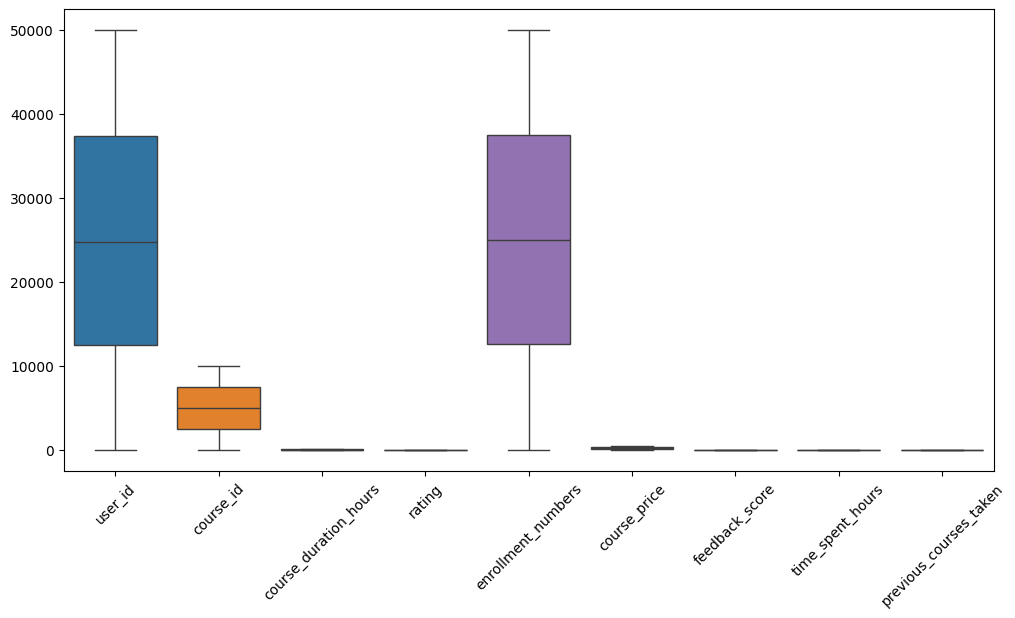

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* After applying IQR we can see the outliers are cleaned, but the range of the data of feature enrollment_number is high and other columns also have different ranges.
* So for preserving reaive differencing we will apply MinMax scaling method for only numerical columns excluding user_id and course_id
* As user_id and course_id are identifier columns not a features.
    
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">


#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Scaling Data</p>

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
#df['enrollment_numbers'] = np.log1p(df['enrollment_numbers'])

In [40]:
num_cols = [
    'course_duration_hours',
    'enrollment_numbers',
    'course_price',
    'time_spent_hours',
    'previous_courses_taken'
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,2.493566e+04,14406.960108,1.000000,12487.750000,24793.500000,37382.250000,49999.000000
course_id,100000.0,5.006864e+03,2882.085456,1.000000,2523.000000,5012.000000,7502.000000,9999.000000
course_duration_hours,100000.0,-1.292477e-16,1.000005,-1.727855,-0.867274,0.000600,0.864828,1.736348
rating,100000.0,3.961453e+00,0.725146,2.000000,3.500000,4.000000,4.500000,5.000000
enrollment_numbers,100000.0,-3.296918e-17,1.000005,-1.737741,-0.866623,0.000325,0.866630,1.733804
course_price,100000.0,6.252776e-17,1.000005,-1.734178,-0.870230,0.008896,0.867754,1.718735
feedback_score,100000.0,7.470375e-01,0.143148,0.346000,0.649000,0.750000,0.851000,1.000000
time_spent_hours,100000.0,-3.922196e-17,1.000005,-1.444721,-0.791216,-0.055472,0.690552,2.913204
previous_courses_taken,100000.0,1.055867e-16,1.000005,-2.270976,-0.902117,0.010456,0.466742,2.520031


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'user_id'),
  Text(1, 0, 'course_id'),
  Text(2, 0, 'course_duration_hours'),
  Text(3, 0, 'rating'),
  Text(4, 0, 'enrollment_numbers'),
  Text(5, 0, 'course_price'),
  Text(6, 0, 'feedback_score'),
  Text(7, 0, 'time_spent_hours'),
  Text(8, 0, 'previous_courses_taken')])

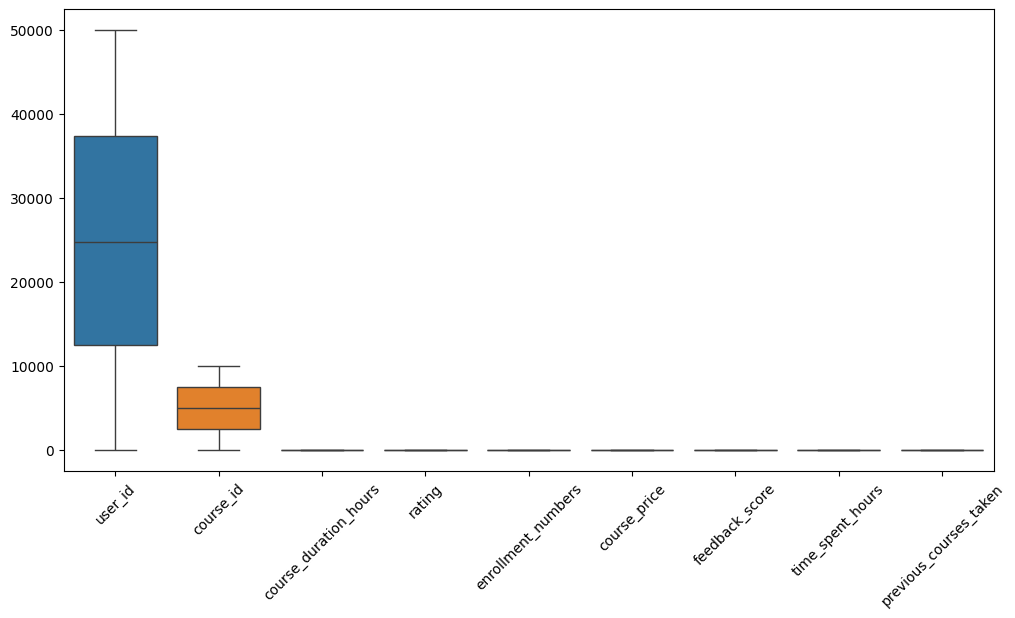

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.xticks(rotation=45)

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Label Encoding</p>

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df['certification_offered'] = df['certification_offered'].map({'Yes':1, 'No':0})
df['study_material_available'] = df['study_material_available'].map({'Yes':1, 'No':0})

# Ordinal encoding
difficulty_map = {'Beginner':0, 'Intermediate':1, 'Advanced':2}
df['difficulty_level'] = df['difficulty_level'].map(difficulty_map)

In [45]:
df.head(5)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,-0.484388,1,0,5.0,-0.239977,0.405909,0.797,1,-0.225824,-0.445831
1,861,1928,Cybersecurity for Professionals,Alexander Young,-0.586491,1,0,4.3,-0.672348,-1.583185,0.770,1,0.609048,1.835601
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,-1.421546,1,0,3.9,-1.294250,0.861334,0.772,1,2.332392,-0.445831
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,0.215745,1,0,3.1,1.611898,0.587906,0.969,0,0.118551,0.466742
4,11285,3361,Ethical Hacking Masterclass,Daniel White,-0.787050,1,0,2.8,0.660488,0.862772,0.555,1,0.097992,0.010456


In [46]:
df[num_cols].corr()

,course_duration_hours,enrollment_numbers,course_price,time_spent_hours,previous_courses_taken
course_duration_hours,1.000000,-0.000591,0.002784,-0.001783,-0.001999
enrollment_numbers,-0.000591,1.000000,0.000441,0.000507,-0.000374
course_price,0.002784,0.000441,1.000000,-0.002828,0.000695
time_spent_hours,-0.001783,0.000507,-0.002828,1.000000,0.002987
previous_courses_taken,-0.001999,-0.000374,0.000695,0.002987,1.000000


<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The features certificate_offered, difficulty_level and study_material_availble are categorical features, which are important for recommendation models for content based filtering, popularity etc.
* So we will apply the label binary label encoding for columns having Yes and No values
* And ordinal encoding for difficulty_level with 0 as beginner, 1 as intermidiate and 2 as advanced.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Feature Selection</p>

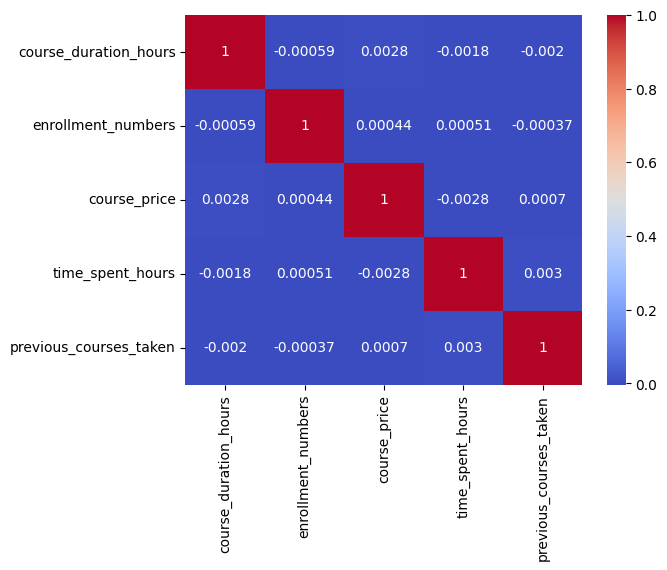

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* The correlation heatmap shows the features are weekly correlated to each others.
* But for the recommendation system the features captures different aspects and every feature is important for checking the relationship with content based, beahaviour based or based on the popularity.
* Almost zero correlation with some features shows there is no redundancy or multicollinearity.
* So for recommendation system instead of removing features, keeping all features give good results in building the recommendation system model.

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

##### Item Based - with Distances and Cosine Similarty

In [48]:
pivot = pd.pivot_table(data=df, index = 'user_id', columns='course_id', values='rating', aggfunc= 'mean')

In [49]:
pivot

course_id,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#pivot.fillna(0, inplace=True)
#pivot

In [51]:
pivot.isna().sum()

course_id
1       43231
2       43234
3       43240
4       43233
5       43236
        ...  
9995    43234
9996    43232
9997    43229
9998    43233
9999    43230
Length: 9998, dtype: int64

### Checking user-Item Interaction Sparcity 

In [52]:
sparsity = 1 - (pivot.count().sum() / pivot.size)
print("Sparsity:", sparsity)

Sparsity: 0.9997687086559349


#### We can the sparcity is > 90%, feature engineering is required.

Checking user activity distribution

In [53]:
df.groupby('user_id')['course_id'].count().describe()

count    43242.000000
mean         2.312566
std          1.254923
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: course_id, dtype: float64

Text(0.5, 1.0, 'User Activity Distribution')

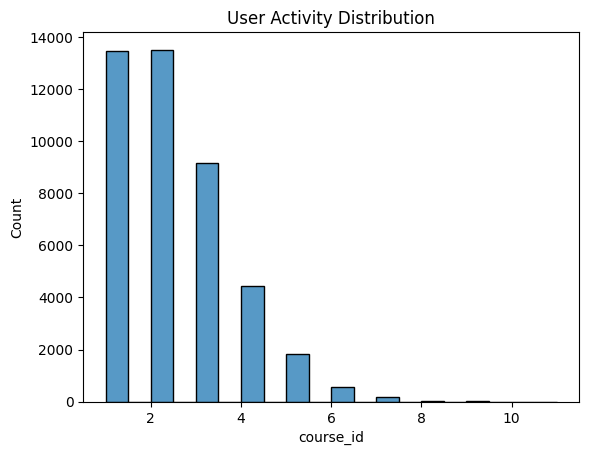

In [54]:
# User Activity Distribution plot
sns.histplot(df.groupby('user_id')['course_id'].count(), bins=20)
plt.title("User Activity Distribution")

In [55]:
# percentage of users with only 1 course interaction
(df.groupby('user_id')['course_id'].count() == 1).mean() * 100

np.float64(31.187271634059478)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Only 31% users interacted with 1 course.
* there is total 43242 number of users count and they interaced atleast one course.
* On an average users interact with 2 to courses, indicating sparse behaviour.
* Low std deviation, shows most of the users clustered around the 1 to 3 courses
* The data s highly sparsed, feature engineering is mandatory
* Most users have very less history, are cold users, the intraction is very less

<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

# Course popularity bias

In [56]:
df.groupby('course_id')['user_id'].count().sort_values(ascending=False)

course_id
4335    23
1139    23
3658    23
346     22
1153    21
        ..
876      2
8583     2
5636     2
3270     2
9060     1
Name: user_id, Length: 9998, dtype: int64

In [57]:
course_counts = df.groupby('course_id')['user_id'].count()
course_counts.describe()

count    9998.000000
mean       10.002000
std         3.106363
min         1.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        23.000000
Name: user_id, dtype: float64

<Axes: xlabel='user_id', ylabel='Count'>

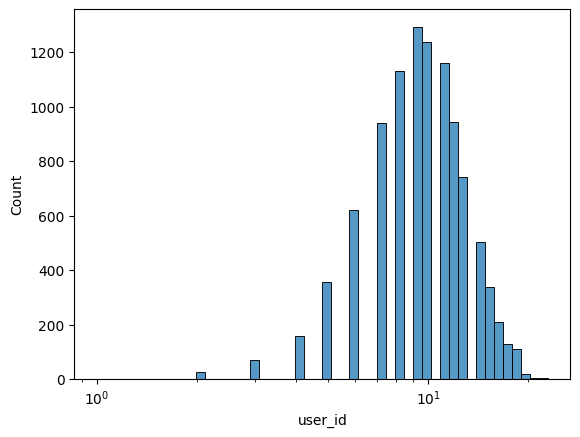

In [58]:
sns.histplot(course_counts, bins=50, log_scale=True)

In [59]:
(course_counts <= 5).mean() * 100

np.float64(6.11122224444889)

<p style="background-color:#008000;color:#fff;font-size:18px;padding:10px"> Observations :</p>
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

* Groups the data course wise and counts how many users interacted with each course, we can see very less courses are interacted by the users, whereas the number courses interacted less is more.
* Only ~6% of courses have 5 or fewer user interactions, there is very less course sparsity, the main chalenge is user sparsity.
<hr style="height:3px;border:none;color:#008000;background-color:#008000;">

#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Feature Selection and Feature Engineering</p>

#### adding popularity as a new feature

In [60]:
df['course_popularity'] = df['course_id'].map(course_counts)
df['course_popularity_norm'] = np.log1p(df['course_popularity'])

In [61]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,course_popularity,course_popularity_norm
0,15796,9366,Python for Beginners,Emma Harris,-0.484388,1,0,5.0,-0.239977,0.405909,0.797,1,-0.225824,-0.445831,9,2.302585
1,861,1928,Cybersecurity for Professionals,Alexander Young,-0.586491,1,0,4.3,-0.672348,-1.583185,0.770,1,0.609048,1.835601,13,2.639057
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,-1.421546,1,0,3.9,-1.294250,0.861334,0.772,1,2.332392,-0.445831,14,2.708050
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,0.215745,1,0,3.1,1.611898,0.587906,0.969,0,0.118551,0.466742,8,2.197225
4,11285,3361,Ethical Hacking Masterclass,Daniel White,-0.787050,1,0,2.8,0.660488,0.862772,0.555,1,0.097992,0.010456,15,2.772589



##### As SVM is not a recommender system by default, we will create a new target features with binary classification, for SVM, by converting the ratings into implicit feedback.
##### If the rating is >= 4, we can consider it as user liked a course and take is as 1.
##### If the rating is < 4, we can consider it as user not liked a course and take it as 0.
##### To make it a binary classification model

#### Creating target variable for binary classification using SVM 

In [62]:
df['liked'] = (df['rating'] >= 4).astype(int)

In [63]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,course_popularity,course_popularity_norm,liked
0,15796,9366,Python for Beginners,Emma Harris,-0.484388,1,0,5.0,-0.239977,0.405909,0.797,1,-0.225824,-0.445831,9,2.302585,1
1,861,1928,Cybersecurity for Professionals,Alexander Young,-0.586491,1,0,4.3,-0.672348,-1.583185,0.770,1,0.609048,1.835601,13,2.639057,1
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,-1.421546,1,0,3.9,-1.294250,0.861334,0.772,1,2.332392,-0.445831,14,2.708050,0
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,0.215745,1,0,3.1,1.611898,0.587906,0.969,0,0.118551,0.466742,8,2.197225,0
4,11285,3361,Ethical Hacking Masterclass,Daniel White,-0.787050,1,0,2.8,0.660488,0.862772,0.555,1,0.097992,0.010456,15,2.772589,0


#### SVM can not work on ID's directly, so we must create user features, course features and interacton features

In [64]:
## user level features

user_features = df.groupby('user_id').agg(
    avg_user_rating=('rating', 'mean'),
    total_courses_taken=('course_id', 'nunique'),
    avg_time_spent=('time_spent_hours', 'mean'),
    avg_feedback_score=('feedback_score', 'mean')
).reset_index()

In [65]:
## Course level features

course_features = df.groupby('course_id').agg(
    avg_course_rating=('rating', 'mean'),
    total_enrollments=('user_id', 'nunique'),
    avg_course_feedback=('feedback_score', 'mean'),
    certification_rate=('certification_offered', 'mean')
).reset_index()


In [66]:
df_model = df.merge(user_features, on='user_id', how='left')
df_model = df_model.merge(course_features, on='course_id', how='left')

In [67]:
df_model.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,...,course_popularity_norm,liked,avg_user_rating,total_courses_taken,avg_time_spent,avg_feedback_score,avg_course_rating,total_enrollments,avg_course_feedback,certification_rate
0,15796,9366,Python for Beginners,Emma Harris,-0.484388,1,0,5.0,-0.239977,0.405909,...,2.302585,1,4.30,2,0.959297,0.8660,4.088889,9,0.746778,0.666667
1,861,1928,Cybersecurity for Professionals,Alexander Young,-0.586491,1,0,4.3,-0.672348,-1.583185,...,2.639057,1,4.15,4,-0.366988,0.8020,4.030769,13,0.722538,0.538462
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,-1.421546,1,0,3.9,-1.294250,0.861334,...,2.708050,0,3.85,2,0.777931,0.8425,4.164286,14,0.777143,0.714286
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,0.215745,1,0,3.1,1.611898,0.587906,...,2.197225,0,3.25,4,-0.178279,0.8770,3.987500,8,0.767125,0.875000
4,11285,3361,Ethical Hacking Masterclass,Daniel White,-0.787050,1,0,2.8,0.660488,0.862772,...,2.772589,0,3.70,4,-0.098427,0.6260,3.706667,15,0.706867,0.866667


In [68]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  int64  
 6   difficulty_level          100000 non-null  int64  
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  float64
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  int64  
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  fl

In [69]:
df_model.isna().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
course_popularity           0
course_popularity_norm      0
liked                       0
avg_user_rating             0
total_courses_taken         0
avg_time_spent              0
avg_feedback_score          0
avg_course_rating           0
total_enrollments           0
avg_course_feedback         0
certification_rate          0
dtype: int64

As we can see, there are 2 categorical features, we will apply One Hot encoding

#### One Hot Encoding on categorical columns`

In [70]:
cat_cols = ['course_name', 'instructor']

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
ohe = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

encoded = ohe.fit_transform(df_model[cat_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=ohe.get_feature_names_out(cat_cols),
    index=df_model.index
)

In [73]:
df_model = pd.concat([df_model, encoded_df], axis=1)
df_model.drop(columns=cat_cols, inplace=True)

In [74]:
df_model

,user_id,course_id,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,...,instructor_Isabella Scott,instructor_James Clark,instructor_Jessica Martinez,instructor_Liam Adams,instructor_Michael Brown,instructor_Olivia Taylor,instructor_Prof. Emily Johnson,instructor_Sarah Lee,instructor_Sophia Anderson,instructor_William Thomas
0,15796,9366,-0.484388,1,0,5.0,-0.239977,0.405909,0.797,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,861,1928,-0.586491,1,0,4.3,-0.672348,-1.583185,0.770,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38159,9541,-1.421546,1,0,3.9,-1.294250,0.861334,0.772,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,44733,3708,0.215745,1,0,3.1,1.611898,0.587906,0.969,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11285,3361,-0.787050,1,0,2.8,0.660488,0.862772,0.555,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10647,5466,-1.279332,1,0,3.9,1.671392,1.613277,0.838,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,13800,2623,0.584045,1,0,3.5,0.698783,-0.706936,0.922,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,47131,1556,0.780958,1,0,4.3,-0.897047,-1.705260,0.990,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,49654,6001,-0.805283,1,0,3.5,-1.050855,1.015492,0.630,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df_model.describe().T[['min','max','mean','std']]

,min,max,mean,std
user_id,1.000000,49999.000000,2.493566e+04,14406.960108
course_id,1.000000,9999.000000,5.006864e+03,2882.085456
course_duration_hours,-1.727855,1.736348,-1.292477e-16,1.000005
certification_offered,0.000000,1.000000,7.005900e-01,0.458002
difficulty_level,0.000000,2.000000,7.034700e-01,0.782998
...,...,...,...,...
instructor_Olivia Taylor,0.000000,1.000000,4.983000e-02,0.217595
instructor_Prof. Emily Johnson,0.000000,1.000000,5.018000e-02,0.218317
instructor_Sarah Lee,0.000000,1.000000,5.022000e-02,0.218400
instructor_Sophia Anderson,0.000000,1.000000,5.090000e-02,0.219795


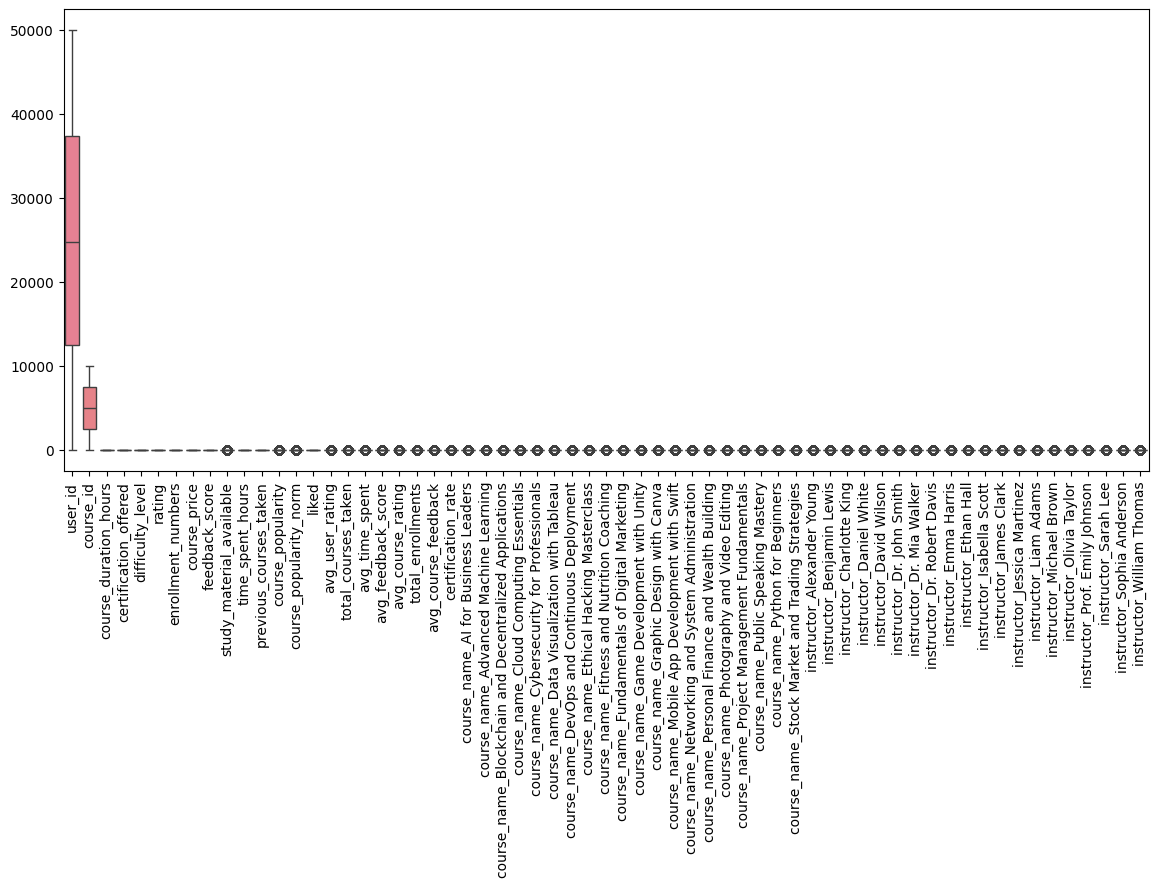

In [76]:
num_cols = df_model.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(14,6))
sns.boxplot(data=df_model[num_cols])
plt.xticks(rotation=90)
plt.show()

In [77]:
features = df_model.drop(columns=['user_id','course_id','rating','liked'])
#scaler = StandardScaler()
X_scaled = features
y = df_model['liked']

## Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [81]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

preds = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

rmse

np.float64(0.39809897009824846)

In [83]:
def recommend_xgb(user_id, n=5):
    seen = df[df.user_id == user_id]['course_id'].unique()
    candidates = df[~df.course_id.isin(seen)].course_id.unique()

    user_enc = user_encoder.transform([user_id])[0]

    rows = []
    for cid in candidates:
        cid_enc = course_encoder.transform([cid])[0]

        course_row = course_stats[course_stats.course_id == cid].iloc[0]
        user_row = user_stats[user_stats.user_id == user_id].iloc[0]

        meta = ohe.transform(
            df[df.course_id == cid][['difficulty', 'instructor']].head(1)
        )

        features = np.hstack([
            [[user_enc, cid_enc,
              course_row.avg_rating, course_row.rating_count,
              user_row.user_avg_rating, user_row.user_rating_count]],
            meta
        ])

        score = xgb_model.predict(features)[0]
        rows.append((cid, score))

    return sorted(rows, key=lambda x: x[1], reverse=True)[:n]

In [84]:
def get_course_details(recs):
    rec_df = pd.DataFrame(recs, columns=['course_id', 'pred_rating'])
    return rec_df.merge(
        df[['course_id', 'course_name']].drop_duplicates(),
        on='course_id',
        how='left'
    )

### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">MODEL BUILDING</p>
#### <p style="padding:10px;background-color:#144500;color:#ffffff;margin:0;font-family:Sans-Serif;font-weight:500">Support Vector Machine </p>